<a href="https://colab.research.google.com/github/MatheusRocha0/Customers-Segmentation/blob/main/Customers_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Machine Learning Project: Customers Segmentation
 
## Fictional Context
 
**Disclaimer: the context I am going to present here is not real, the CEO and the company only exist on my mind.**
 
I was hired by a company to solve a marketing problem. They had a database about their customers containing informations like: Age, Spending Score, Gender and Annual Income.
 
My goal here is to find out a way to separate these people into different groups based in their characteristics, this way, the marketing team can create better strategies to increase the profit.
 
But there is one problem, this dataset does not have any label, so it is extremely hard to find out any useful information for this purpose. But there is one way to solve this problem, by using Machine Learning.
 
It is possible to use Machine Learning algorithms to separate the samples into different groups.

 # 0.0 Preparation

## 0.1 Libraries

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

## 0.2 Loading the data

In [ ]:
 df = pd.read_csv("https://github.com/MatheusRocha0/Customers-Segmentation/raw/main/Mall_Customers.csv")
cols = ["id", "gender", "age", "ai", "ss"]
df.columns = cols
df.head()

,id,gender,age,ai,ss
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 0.3 Helper Functions

In [ ]:
 def color(y):
   colors = []
 
   for i in range(len(y)):
      if y[i] == np.max(y):
         colors.append("crimson")
 
      elif y[i] == np.min(y):
         colors.append("lightskyblue")
 
      else:
         colors.append("gray")
 
   return colors
   
 
def add_labels(x, y):
   for i in range(len(x)):
      plt.text(i, y[i]//2, round(y[i]), ha = "center", fontsize = 20, weight = "bold", color = "white")
 
def bar_config():
   ax.spines["bottom"].set_visible(False)
   ax.spines["top"].set_visible(False)
   ax.spines["right"].set_visible(False)
   ax.spines["left"].set_visible(False)
   ax.tick_params(labelsize = 15)
   plt.gca().axes.get_yaxis().set_visible(False)

# 1.0 Data Cleaning
 
It is necessary to clean things from the dataset like missing values, outliers, duplicates and etc because they can affect the model's performance.

## 1.1 Dropping unnecessary columns

In [ ]:
 x = df.drop("id", axis = 1)
x.head()

,gender,age,ai,ss
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## 1.2 Treating missing values

In [ ]:
 
print("""How Many Missing values are there in each variable?
Variable | Missing values""")
x.isnull().sum()

How Many Missing values are there in each variable?
Variable | Missing values


gender    0
age       0
ai        0
ss        0
dtype: int64

## 1.3 Treating Duplicates

In [ ]:
df.drop_duplicates(inplace = True)

## 1.4 Transforming text into numbers
 
Scikit-Learn's algorithms do not work with text data, that is why it is necessary to turn text into numbers.

In [ ]:
 le = LabelEncoder().fit(x.gender)
x["gender"] = le.transform(x["gender"])

## 1.5 Treating Outliers
 
### 1.5.1 Using boxplot to detect them
 
Boxplot is a chart that shows outliers as black points out of a box.

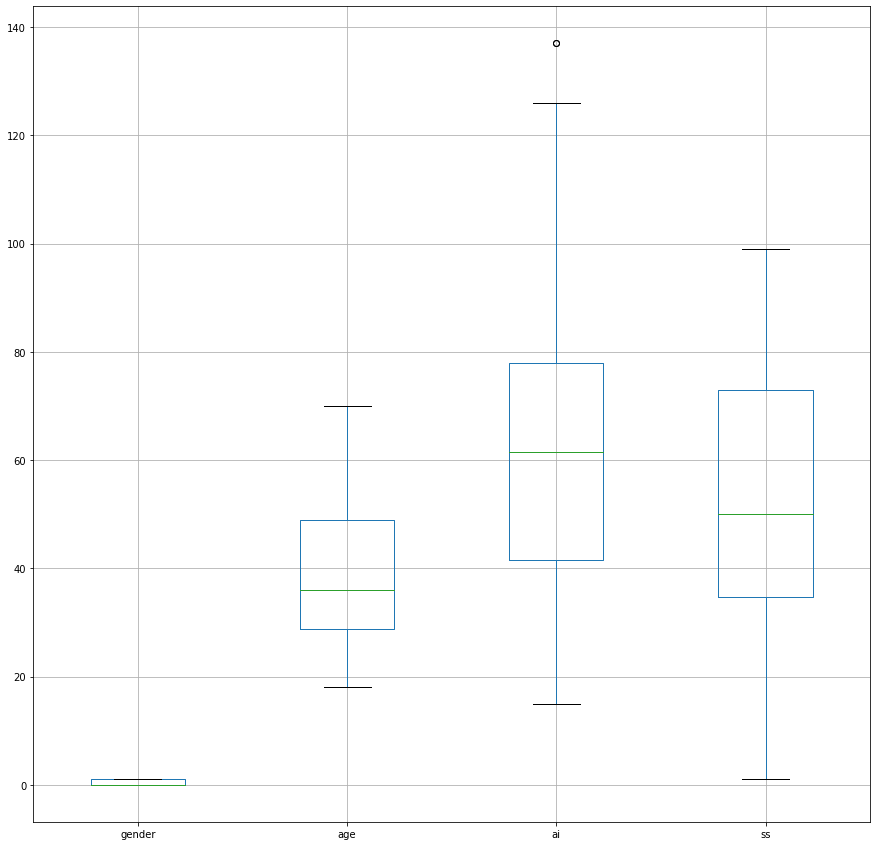

In [ ]:
x.boxplot(figsize = (15, 15))
plt.show()

We can see the dataset does not have any outlier.

# 2.0 Machine Learning Model

## 2.1 PCA (Principal Component Analysis)

It is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [ ]:
 pca = PCA(n_components = 2)
pca.fit(x)
pc = pca.transform(x)

## 2.2 Elbow Method

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

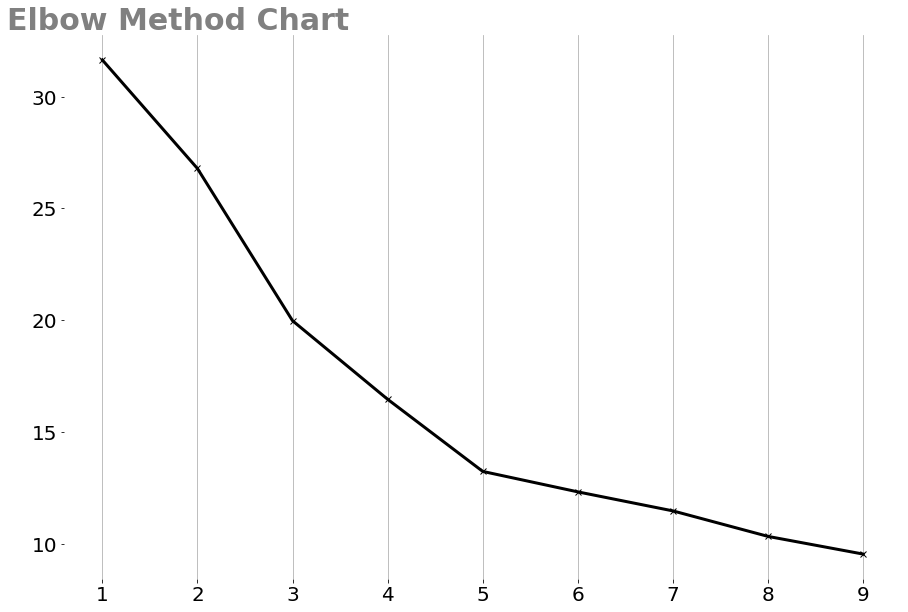

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
   
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pc)
 
    distortions.append(sum(np.min(cdist(pc, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / pc.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(pc, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / pc.shape[0]
    mapping2[k] = kmeanModel.inertia_
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(K, distortions, 'bx-', linewidth = 3, color = "black")
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(labelsize = 20)
plt.grid(axis = "x")
plt.text(x = 0, y = 33, s = "Elbow Method Chart", fontsize = 30, weight = "bold", color = "gray")
plt.show()

Following the chart, the optimal number of clusters is 5.

## 2.3 Training the model
 
I will now train the model and evaluate it using an evaluation metric.
 
**Silhouette Score**: is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. Basically, the greater, the better.

In [ ]:
 kmeans = KMeans(n_clusters = 5, random_state = 0)
label = kmeans.fit_predict(pc)
 
df["label"] = label
 
score = silhouette_score(pc, label, random_state = 0)
print("Silhouette Score is: ", score)

Silhouette Score is:  0.5526264331833406


 0.55 is a great value.

## 2.4 Clusters

Now I will plot a chart of all groups grouped by label.

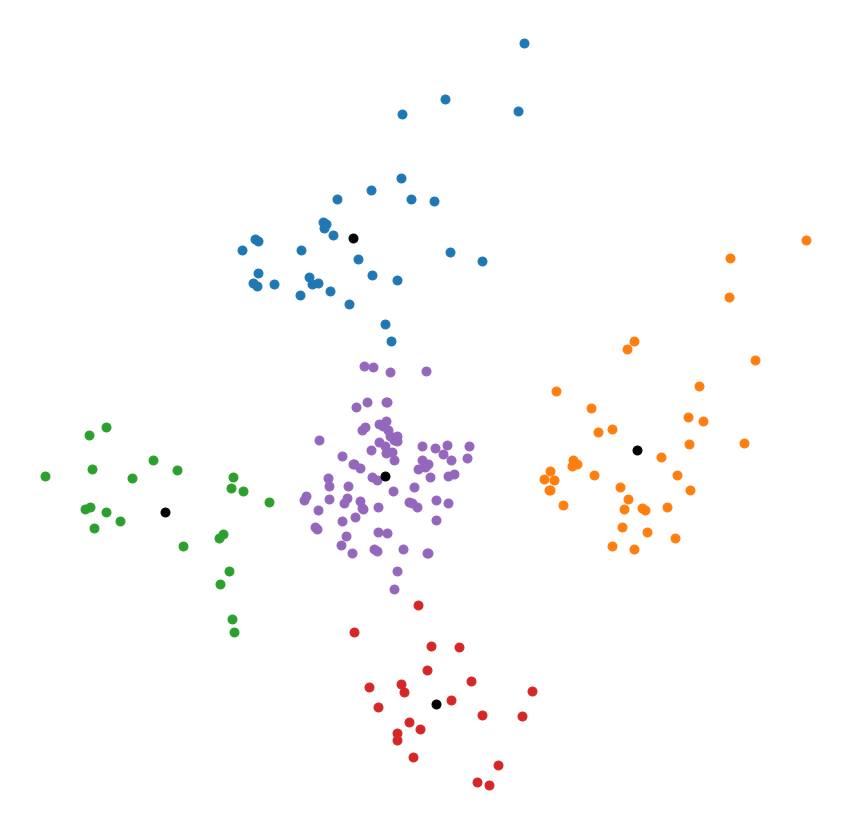

In [ ]:
 u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
 
plt.figure(figsize = (15, 15))
ax = plt.subplot(111)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(labelsize = 8)
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
 
for i in u_labels:
   ax.scatter(pc[label == i, 0], pc[label == i, 1], s = 80, label = i)
ax.scatter(centroids[:, 0], centroids[:, 1], s = 80, color = "black")
plt.show()

We can see 5 well distributed clusters, just like how the Elbow chart told.

# 3.0 Data Analysis
 
It is now time to analyze the dataset. Here, I will generate many charts to answer questions I have and after a long session I will finish with what I have discovered.

## 3.1  What is the Gender distribution?

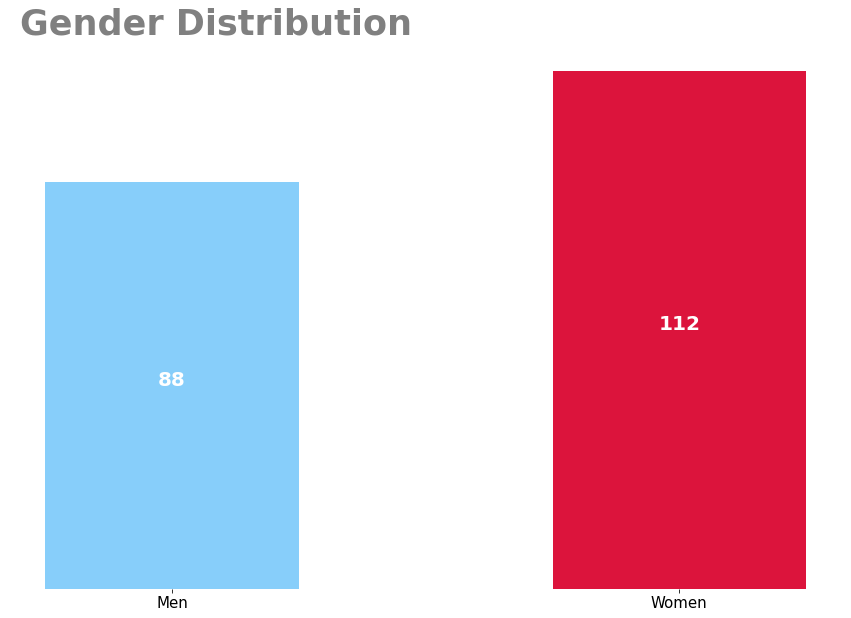

In [ ]:
 men = df[df.gender == "Male"].age.count()
women = df[df.gender == "Female"].age.count()
 
labels = ["Men", "Women"]
values = [men, women] 
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(x = labels, height = values, color = color(values), width = .5)
bar_config()
add_labels(labels, values)
plt.text(s = "Gender Distribution", weight = "bold", fontsize = 35, color = "gray", x = -.3, y = 120)
plt.show()

## 3.2  What is the average age of each group?

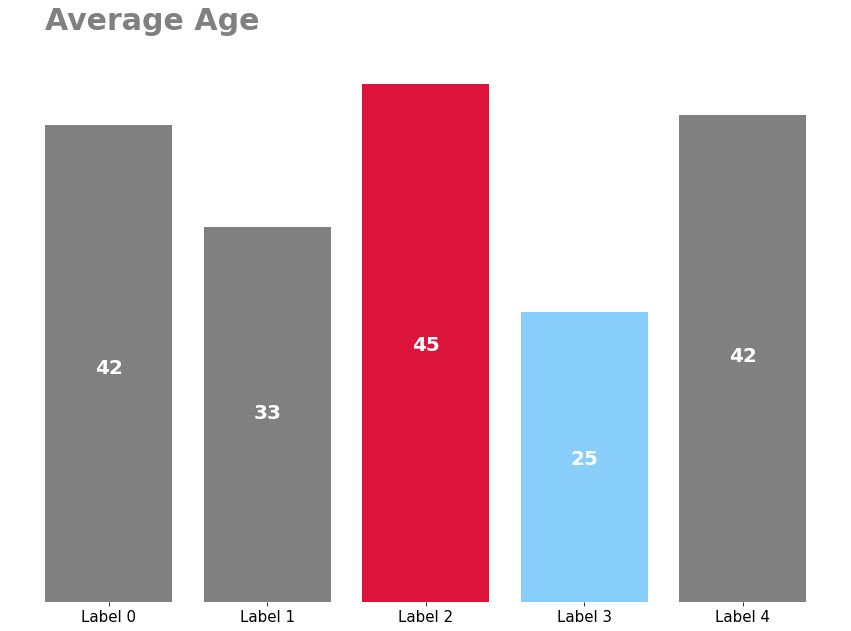

In [ ]:
 label0age = df[df.label == 0].age.mean()
label1age = df[df.label == 1].age.mean()
label2age = df[df.label == 2].age.mean()
label3age = df[df.label == 3].age.mean()
label4age = df[df.label == 4].age.mean()
 
labels = ["Label 0", "Label 1", "Label 2", "Label 3", "Label 4"]
values = [label0age, label1age, label2age, label3age, label4age]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(x = labels, height = values, color = color(values))
bar_config()
plt.text(s = "Average Age", weight = "bold", fontsize = 30, color = "gray", x = -.4, y = 50)
add_labels(labels, values)
plt.show()

## 3.3  What is the average Annual Income of each group?

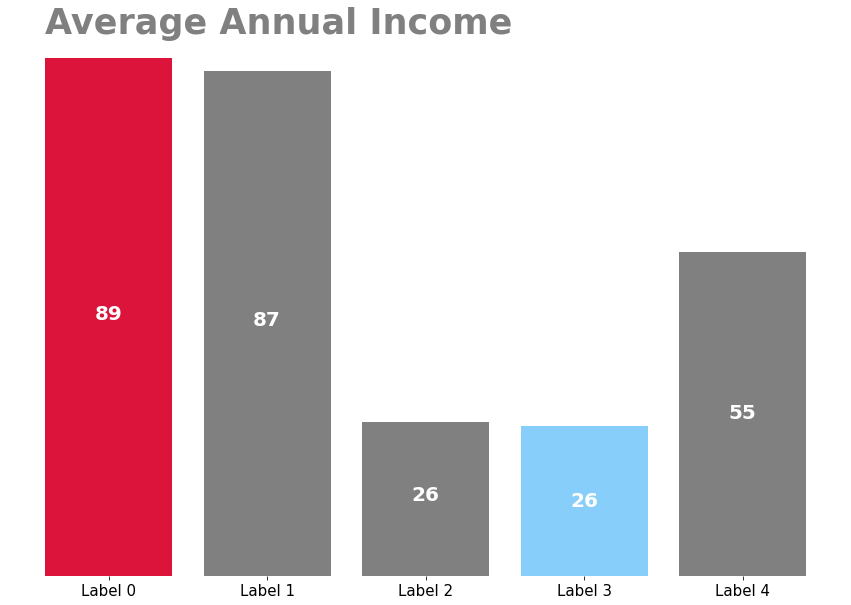

In [ ]:
 label0ai = df[df.label == 0].ai.mean()
label1ai = df[df.label == 1].ai.mean()
label2ai = df[df.label == 2].ai.mean()
label3ai = df[df.label == 3].ai.mean()
label4ai = df[df.label == 4].ai.mean()
 
values = [label0ai, label1ai, label2ai, label3ai, label4ai]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(x = labels, height = values, color = color(values))
bar_config()
plt.text(s = "Average Annual Income", weight = "bold", fontsize = 35, color = "gray", x = -.4, y = 93)
add_labels(labels, values)
plt.show()

## 3.4 What is the average Spending Score of each group?

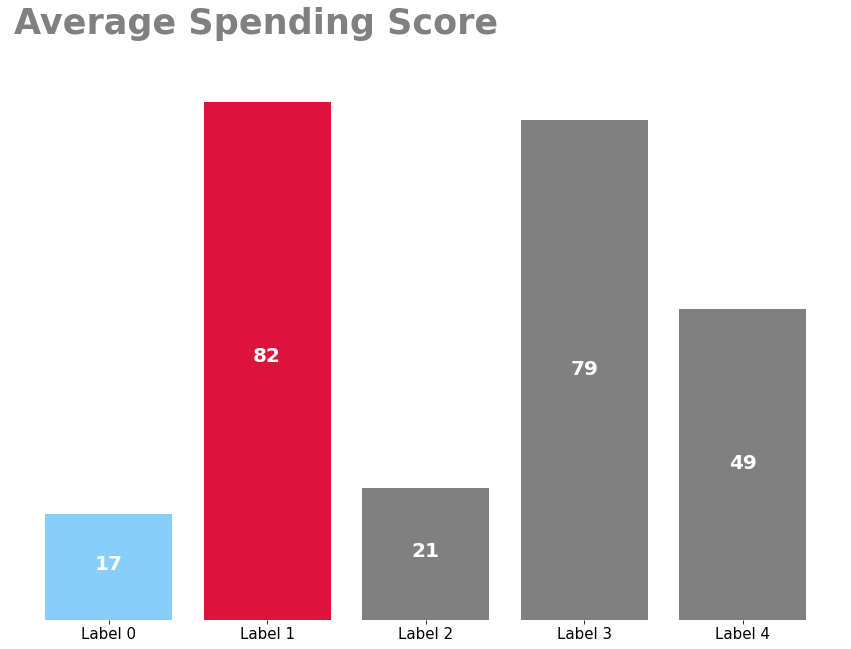

In [ ]:
 label0ss = df[df.label == 0].ss.mean()
label1ss = df[df.label == 1].ss.mean()
label2ss = df[df.label == 2].ss.mean()
label3ss = df[df.label == 3].ss.mean()
label4ss = df[df.label == 4].ss.mean()
 
values = [label0ss, label1ss, label2ss, label3ss, label4ss]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(x = labels, height = values, color = color(values))
bar_config()
plt.text(s = "Average Spending Score", weight = "bold", fontsize = 35, color = "gray", x = -.6, y = 93)
add_labels(labels, values)
plt.show()

## 3.5 Which gender spends the most?

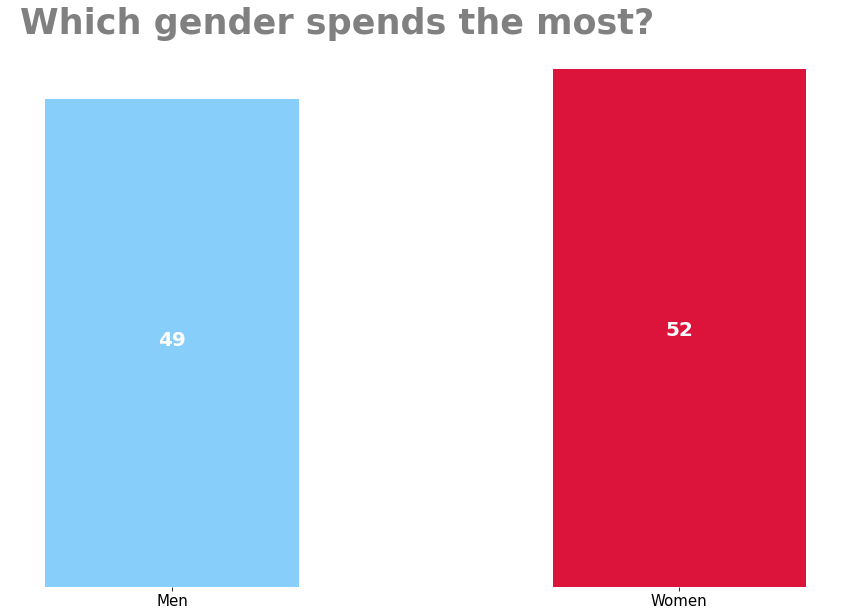

In [ ]:
 men = df[df.gender == "Male"].ss.mean()
women = df[df.gender == "Female"].ss.mean()
 
labels = ["Men", "Women"]
values = [men, women]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(x = labels, height = values, color = color(values), width = .5)
bar_config()
plt.text(s = "Which gender spends the most?", weight = "bold", fontsize = 35, color = "gray", x = -.3, y = 55)
add_labels(labels, values)
plt.show()

## 3.6 What is the labels distribution?

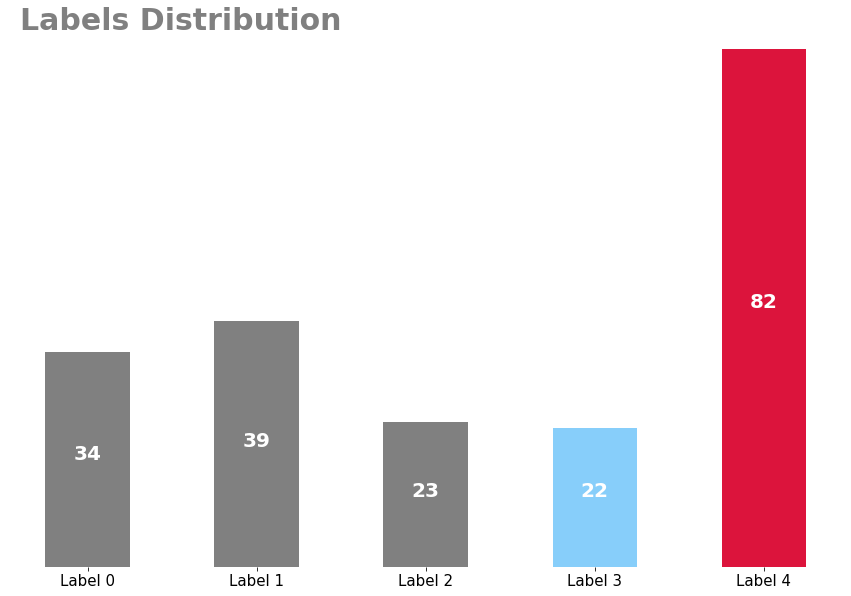

In [ ]:
 label0 = df[df.label == 0].age.count()
label1 = df[df.label == 1].age.count()
label2 = df[df.label == 2].age.count()
label3 = df[df.label == 3].age.count()
label4 = df[df.label == 4].age.count()
 
labels = ["Label 0", "Label 1", "Label 2", "Label 3", "Label 4"]
values = [label0, label1, label2, label3, label4]
 
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.bar(x = labels, height = values, color = color(values), width = .5)
bar_config()
plt.text(s = "Labels Distribution", weight = "bold", fontsize = 30, color = "gray", x = -.4, y = 85)
add_labels(labels, values)
plt.show()

## 3.7 What is the gender distribution by group?

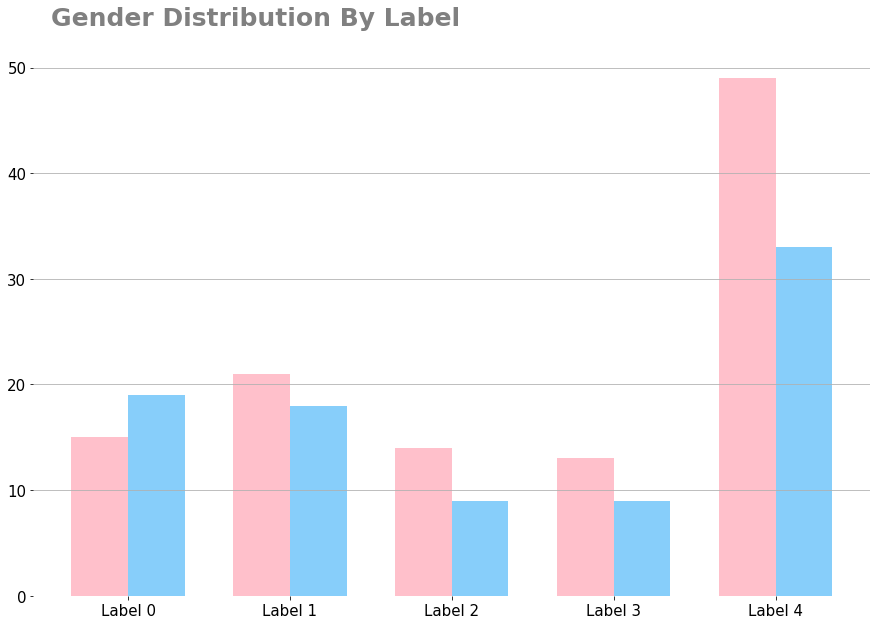

In [ ]:
 women = [15, 21, 14, 13, 49]
men = [19, 18, 9, 9, 33]
 
labels = ("Label 0", "Label 1", "Label 2", "Label 3", "Label 4")
 
n = 5
index = np.arange(n)
bar_width = .35
 
plt.figure(figsize = (15, 10))
ax = plt.subplot()
ax.bar(index, women, bar_width, color = "pink")
ax.bar(index + bar_width, men, bar_width, color = "lightskyblue")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(labelsize = 15) 
plt.grid(True, axis = "y")
plt.text(s = "Gender Distribution By Label", x = -.3, y = 54, weight = "bold", color = "gray", fontsize = 25)
plt.show()

## 3.8 Conclusion
 
1 - Most people are women
 
2 - The age in all groups is well distributed. But the group 3 is significantly the newest and group 2 is the oldest.
 
3 - Group 0 and 1 have a really good average annual income, over 85 thousand a year. And group 2 and 3 have a low average annual income of 26 thousand a year.
 
4 - Even group 0 having the highest average income, people from this group are who spend the least. But group 1 has a high average income and spends the most.
 
5 - Women spend more than men, but not too much.
Most of people are from group 4 and there are few people from group 3.
 
6 - Most of women are in group 4.
 
## 4.0 By analyzing the results, I could conclude:
 
1 - Group 1 and group 3: are the best groups for the company.
 
2 - Group 0: is the worst, and the marketing campaign should focus in them to try increase their Spending Score.
 
3 - Group 2: there is no too much to do about this group, since its annual income and spending score are low. It is also the oldest group, they are probably people who are not so interested in the company.
 
4 - Group 4: this group is also good for the company, because even they not having a high income nor a high spending score, most people belong to this group. So, the little ends up being very.
 
# **That's All**